# bulbea
> Deep Learning based Python Library for Stock Market Prediction and Modelling

![](bulbea.png)

A canonical way of importing the `bulbea` module is as follows:

In [1]:
import bulbea as bb

### `bulbea.Share`

In order to analyse a desired share, we use the `Share` object defined under `bulbea` which considers 2 arguments - *the **source code** for the economic data* and *the **ticker symbol** for a said company*.

In [2]:
from coinmarketcap_draw import coinmarketcap_data

Go ahead and create a `Share` object as follows:

In [3]:
coin_name = 'exchange-union'
data = coinmarketcap_data(coin_name)

In [4]:
share = bb.Share("123",'123',data=data)

/Users/geleichen/Desktop/NewBillions/bloomberg_crypto/lstm_research/gelei_bulbea/bulbea/entity/share.py:174: UserWarning: Environment variable BULBEA_QUANDL_API_KEY for Quandl hasn't been set. A maximum of 50000 calls per day can be made. Visit https://www.quandl.com to get your API key.
  warnings.warn(message)


By default, a `Share` object for a said source and symbol provides you historical data since a company's inception, as a `pandas.DataFrame` object. In order to access the same, use the `Share` object's member variable - `data` as follows:

In [5]:
data     = share.data
nsamples = 5
data.tail(nsamples)

,market_cap,price_btc,price_usd,volume_usd,volume_token,Close
time,,,,,,
2017-12-02 22:49:40,183126291.0,0.000670,7.38456,2322860.0,314556.317506,7.38456
2017-12-02 23:49:37,181710542.0,0.000670,7.32747,2307190.0,314868.569916,7.32747
2017-12-03 00:49:35,184102857.0,0.000675,7.42394,2314960.0,311823.640816,7.42394
2017-12-03 01:49:36,184216434.0,0.000681,7.42852,2147910.0,289143.732534,7.42852
2017-12-03 01:54:32,183984320.0,0.000681,7.41916,2118070.0,285486.497124,7.41916


In order to analyse a given attribute, you could plot the same as follows:

In [6]:
figsize = (20, 15)

% matplotlib inline

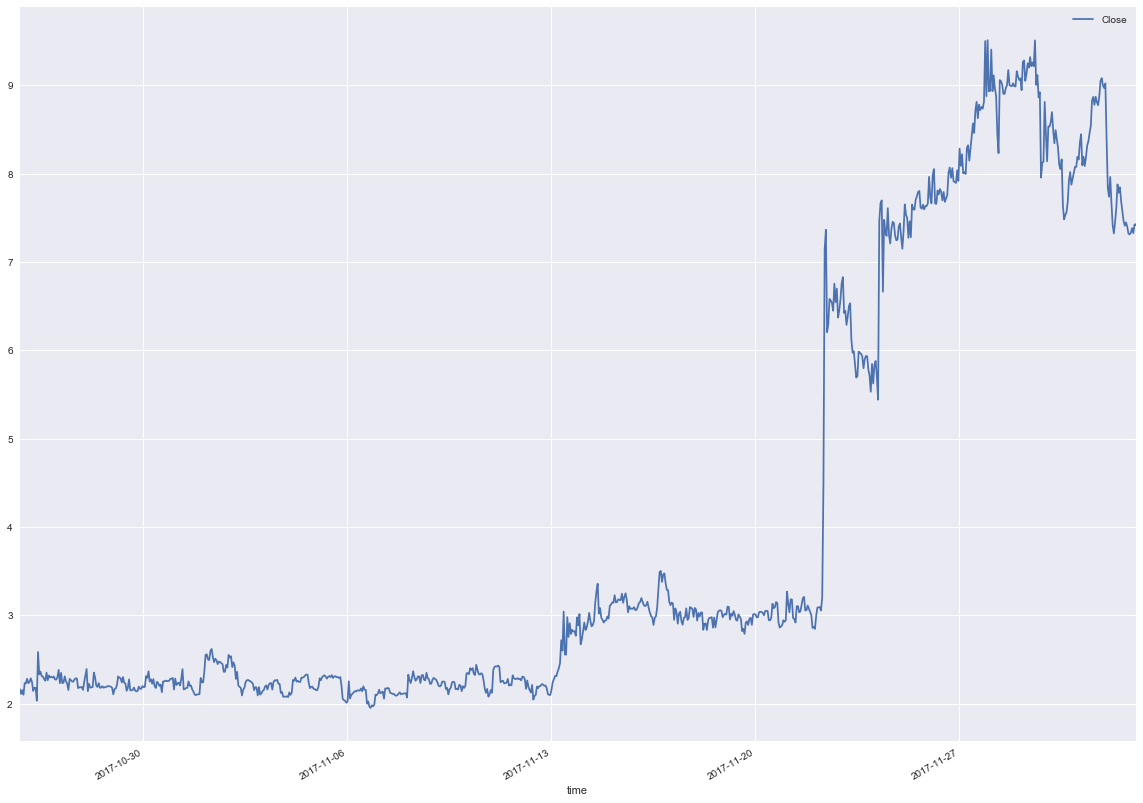

In [7]:
share.plot(figsize = figsize)

### Statistics

#### Global Mean
In order to plot the **global mean** of the stock, we could do the same as follows:

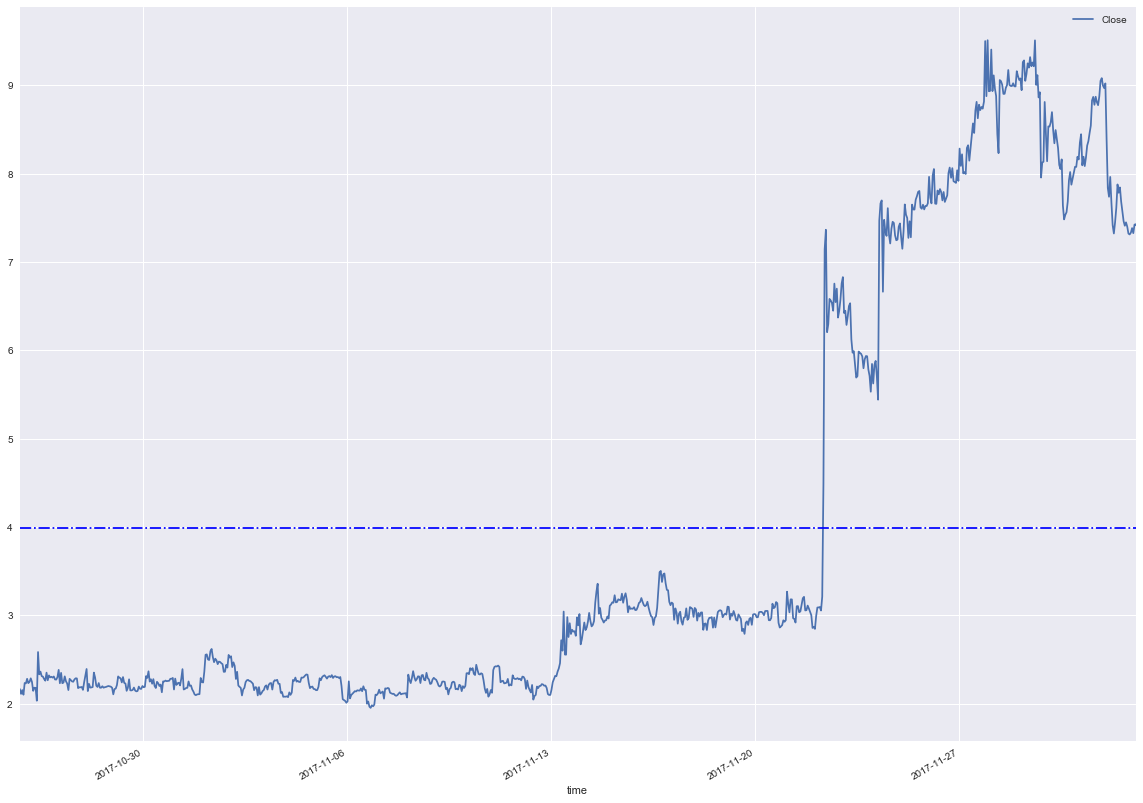

In [8]:
share.plot(figsize = (20, 15), global_mean = True)

#### Moving Averages and Bollinger Bands (R)

In [9]:
bands = share.bollinger_bands(period = 50, bandwidth = 2)
bands.tail(nsamples)

,Lower (Close),Mean (Close),Upper (Close)
time,,,
2017-12-02 22:49:40,6.982210,8.114254,9.246298
2017-12-02 23:49:37,6.949076,8.101927,9.254778
2017-12-03 00:49:35,6.921724,8.090202,9.258680
2017-12-03 01:49:36,6.893827,8.077204,9.260581
2017-12-03 01:54:32,6.866119,8.064044,9.261968


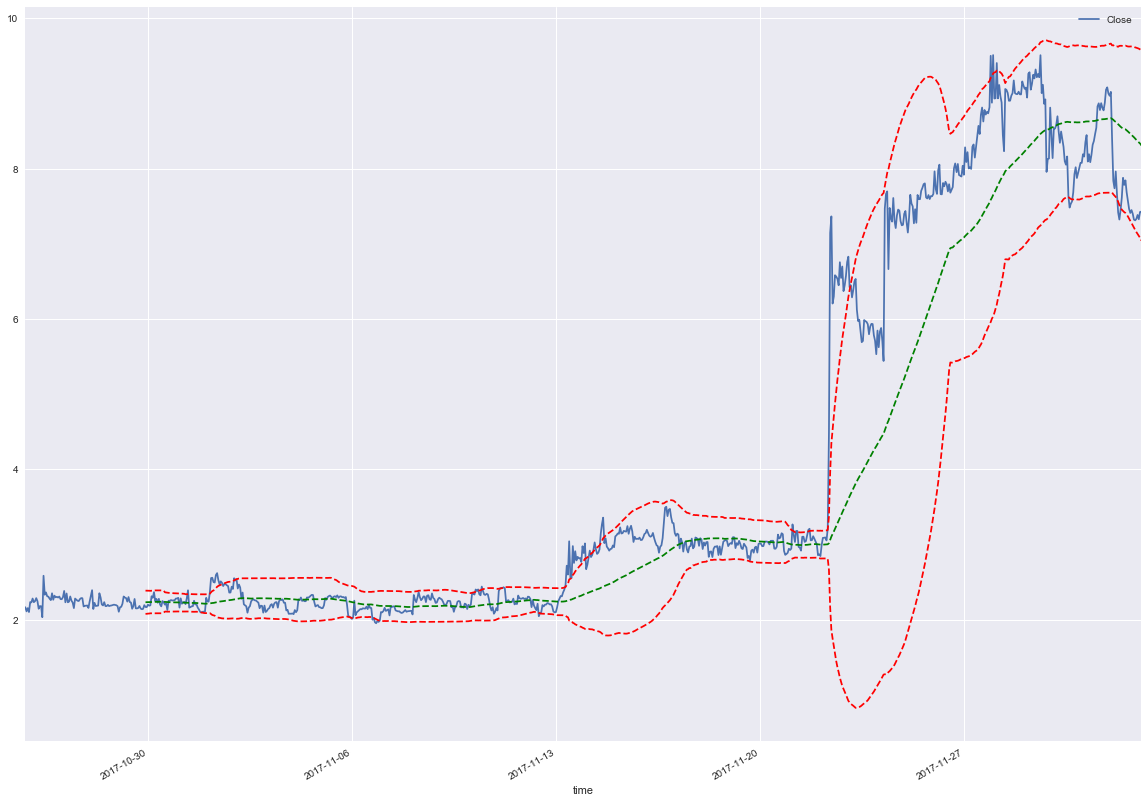

In [10]:
share.plot(['Close'], figsize = (20, 15), bollinger_bands = True, period = 100, bandwidth = 2)

### Training & Testing

In [11]:
from bulbea.learn.evaluation import split

In [12]:
Xtrain, Xtest, ytrain, ytest = split(share, 'Close', normalize = True)

In [13]:
import numpy as np
Xtrain  = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 1))
Xtest  = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], 1))

### Modelling

In [14]:
from bulbea.learn.models import RNN

Using TensorFlow backend.


In [15]:
rnn = RNN([1, 100, 100, 1]) # number of neurons in each layer

/Users/geleichen/Desktop/NewBillions/bloomberg_crypto/lstm_research/gelei_bulbea/bulbea/learn/models/ann.py:29: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  return_sequences = True
/Users/geleichen/Desktop/NewBillions/bloomberg_crypto/lstm_research/gelei_bulbea/bulbea/learn/models/ann.py:29: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=100)`
  return_sequences = True
/Users/geleichen/Desktop/NewBillions/bloomberg_crypto/lstm_research/gelei_bulbea/bulbea/learn/models/ann.py:36: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  self.model.add(core.Dense(output_dim = sizes[-1]))


#### TRAINING

In [16]:
rnn.fit(Xtrain, ytrain)

Epoch 1/10
547/547 [==============================] - 2s - loss: 0.0029      

#### TESTING

In [17]:
predicted = rnn.predict(Xtest)

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
sqr_err = mean_squared_error(ytest, predicted)
print(sqr_err)

0.00725743453091


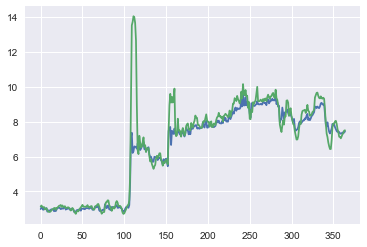

In [20]:
import matplotlib.pyplot as pplt
from bulbea.entity.share import _reverse_cummulative_return

_,_,_,ori_ytest = split(share, 'Close', normalize = False)

new_pre = []
for x in range(0,len(ori_ytest)):
    t = ori_ytest[x]
    predict = predicted[x]
    new_pre.append(_reverse_cummulative_return(t,predict))

pplt.plot(ori_ytest)
pplt.plot(new_pre)
pplt.show()

In [21]:
data.tail(5)

,market_cap,price_btc,price_usd,volume_usd,volume_token,Close
time,,,,,,
2017-12-02 22:49:40,183126291.0,0.000670,7.38456,2322860.0,314556.317506,7.38456
2017-12-02 23:49:37,181710542.0,0.000670,7.32747,2307190.0,314868.569916,7.32747
2017-12-03 00:49:35,184102857.0,0.000675,7.42394,2314960.0,311823.640816,7.42394
2017-12-03 01:49:36,184216434.0,0.000681,7.42852,2147910.0,289143.732534,7.42852
2017-12-03 01:54:32,183984320.0,0.000681,7.41916,2118070.0,285486.497124,7.41916


In [22]:
_, Xtest, _, ytest = split(share, 'Close', normalize = True, train = 0.0)
_,ori_Xtest,_,ori_ytest = split(share, 'Close', normalize = False, train = 0.0)
Xtest  = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], 1))

In [23]:
predicted = rnn.predict(Xtest)

In [24]:
mean_squared_error(ytest, predicted)

0.0036923710596420169

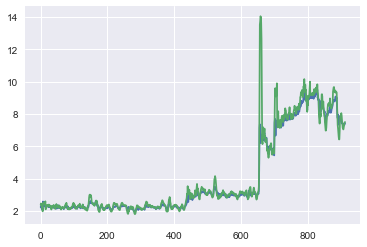

In [25]:
new_pre = []
for x in range(0,len(ori_ytest)):
    t = ori_ytest[x]
    predict = predicted[x]
    new_pre.append(_reverse_cummulative_return(t,predict))

pplt.plot(ori_ytest)
pplt.plot(new_pre)
pplt.show()

In [26]:
print(ori_Xtest[-1])

[ 7.44958  7.40163  7.32234  7.31284  7.33295  7.38456  7.32747  7.42394]


In [27]:
from datetime import datetime
rnn.model.save("models/{}_{}_{}.h5".format(coin_name,sqr_err,datetime.utcnow().strftime('%Y_%b_%d_%H_%M')))